In [2]:
# Info

# Project Tire: "./UFO_project_flat_tire_rear.parquet"
# UFO OK = UFO1_736 - UFO1_747
# Flat Tire Rear Left = UFO1_748 - 757
# 758, 759 -> Fehlversuche
# Flat Tire Rear Right = UFO1_760 - UFO1_770
# Flat Tire Rear Right, Strong Flat Tire Rear Left = UFO1_771 - UFO1_782

In [3]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd  # pandas is used for data manipulation and analysis. It provides DataFrame and Series objects.
import numpy as np  # numpy is used for numerical operations and handling arrays.
import re  # re provides support for working with regular expressions, which is useful for text cleaning and processing.
import matplotlib.pyplot as plt  # matplotlib.pyplot is a plotting library for creating visualizations like line plots, bar charts, etc.
import seaborn as sns

# Set default pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Adjust width to fit the screen
pd.set_option('display.max_colwidth', None) # Show full column width

# Now, any DataFrame printed will use these settings

In [4]:
# Load the dataset from a CSV file into a pandas DataFrame
# The file path "/content/data.csv" points to the location of the dataset
data = pd.read_parquet("UFO_project_flat_tire_rear.parquet")

# Display the first 3 rows of the DataFrame to inspect its structure and content
data.head(3)


,HPC Time [msec],Source,Vehicle State [-],Steer algorithm [-],Desired speed [kph],Vehicle Speed [kph],Desired Acc [m/ss],Vehicle Acc [m/ss],Desired steering radius [m],Int. desired speed [kph],Int. desired steering radius [m],Int. desired steering angle [Â°],Desired steering speed [-],Steering position [-],Desired brake pressure [Bar],Brake pressure [Bar],Desired brake position [-],Brake position [-],Desired brake speed [-],Steering angle measured [Â°],GPS Lat [Â°],GPS Long [Â°],Pos E [m],Pos N [m],Desired Pos X [m],Desired Pos Y [m],Pos X [m],Pos Y [m],Speed [kph],GPS Direction [Â°],GPS Heading [Â°],Change of Heading [Â°/s],GPS Num satellites [-],GPS Pos Accuracy [m],GPS Heading Accuracy [Â°],Speed Accuracy [m/s],Position on Path [m],Side deviation [m],Way deviation [m],Heading deviation [Â°],Time deviation [s],Speed deviation [kph],Acc deviation [m/ss],Acc X [m/ss],Acc Y [m/ss],Acc Z [m/ss],AngRate Z [Â°/s],Way from motors [m],Motor [L] RPM [1/min],Motor [L] Current [A],Motor [L] Voltage [V],Motor [L] Throttle [-],Motor [L] Brake [-],Motor [L] State [-],Motor [L] Temp [Â°C],Motor [L] PWM [â€°],Motor [R] RPM [1/min],Motor [R] Current [A],Motor [R] Voltage [V],Motor [R] Throttle [-],Motor [R] Brake [-],Motor [R] State [-],Motor [R] Temp [Â°C],Motor [R] PWM [â€°],Slip rear left [%],Slip rear right [%],Slip front left [%],Slip front right [%],RPM front left [-],RPM front right [-],Batt Voltage 1 [V],Batt Current 1 [A],Batt State of charge 1 [%],Batt Voltage 2 [V],Batt Current 2 [A],Batt State of charge 2 [%],Batt Voltage 3 [V],Batt Current 3 [A],Batt State of charge 3 [%],Time to meeting pos [s],VUT distance to crashpoint [m],VUT time to meeting pos [s],VUT long distance [m],VUT lat distance [m],VUT speed [kph],VUT Pos E [m],VUT Pos N [m],VUT Pos X [m],VUT Pos Y [m],VUT distance to UFO [m],VUT side deviation [m],TTC long [s],TTC lat [s],TTC abs [s],Network roundtrip time [ms],Additional side offset [m],Additional forward offset [m],Additional offset blend factor [1],Safety CPU temp [Â°C],Safety state [-],Safety flags #1 [-],Safety flags #2 [-],Safety flags #3 [-],Safety flags #4 [-],Relay State [-],Main buffer batt voltage [V],GNSS buffer batt voltage [V],test_number,UFO_number,UFO_test_combined,Motor [L] ctrl temp [Â°C],Motor [R] ctrl temp [Â°C],Time (UTC+1:00),Motor [L] Throttle [A],Motor [R] Throttle [A],Motor [FL] RPM [1/min],Motor [FL] Current [A],Motor [FL] Voltage [V],Motor [FL] Throttle [A],Motor [FL] Brake [-],Motor [FL] State [-],Motor [FL] Temp [Â°C],Motor [FL] ctrl temp [Â°C],Motor [FL] PWM [â€°],Motor [FR] RPM [1/min],Motor [FR] Current [A],Motor [FR] Voltage [V],Motor [FR] Throttle [A],Motor [FR] Brake [-],Motor [FR] State [-],Motor [FR] Temp [Â°C],Motor [FR] ctrl temp [Â°C],Motor [FR] PWM [â€°]
189647,0.0,M,3.0,0.0,0.00,0.02,0.0,-0.013,0.0,NaN,NaN,NaN,0.024,0.278,0.0,0.0946,0.5713,0.571,0.0000,-0.031,52.630049,10.77064,132.203,164.217,0.0,-0.0,-0.019,-0.0,0.02,0.0,201.07,0.000,16.0,0.043,1.904,0.01,-0.019,-0.0,0.0,-0.29,0.0,0.02,-0.013,-0.1,-0.2,9.8,-0.029,NaN,0.0,2.6,52.6,0.0,0.0,201.0,21.7,0.0,0.0,1.4,52.6,0.0,0.0,201.0,23.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.7,-0.5,83.6,52.7,-0.4,75.5,52.6,-0.9,82.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,-0.0,0.0,1.0,48.0,7.0,0xFF77,0xFFF1,0x13FF,0x07A1,0xFFFF,26.3,13.3,736,UFO1,UFO1_736,22.0,23.6,2024-10-15 10:40:09.320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189648,0.0,M,3.0,3.0,0.00,0.02,1.4,0.020,0.0,NaN,NaN,NaN,0.142,0.279,0.0,0.1485,0.5713,0.572,-0.0236,-0.003,52.630049,10.77064,132.203,164.218,0.0,-0.0,-0.019,-0.0,0.02,0.0,201.07,0.093,16.0,0.043,1.904,0.01,-0.019,-0.0,0.0,-0.29,0.0,0.02,-1.380,-0.1,-0.1,9.9,0.103,NaN,0.0,2.6,52.6,32600.0,0.0,201.0,21.7,0.0,0.0,1.4,52.6,32600.0,0.0,201.0,23.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.7,-0.5,83.6,52.7,-0.4,75.5,52.6,-0.9,82.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.3,-0.0,0.0,1.0,48.0,7.0,0xFF77,0xFFF1,0x13FF,0x07A1,0xFFFF,26.3,13.3,736,UFO1,UFO1_736,

In [5]:
# Create a copy of the DataFrame
df = data.copy()

In [6]:
# List of original column names
original_columns = list(df.columns)
pd.DataFrame(original_columns)

,0
0,HPC Time [msec]
1,Source
2,Vehicle State [-]
3,Steer algorithm [-]
4,Desired speed [kph]
5,Vehicle Speed [kph]
6,Desired Acc [m/ss]
7,Vehicle Acc [m/ss]
8,Desired steering radius [m]
9,Int. desired speed [kph]


### Cleaning Data headers

In [7]:
# Function to clean column names (removing text inside square brackets and extra spaces)
def clean_column_name(column):
    return re.sub(r"\s*\[.*?\]", "", column).strip()

# Apply cleaning to all column names
cleaned_columns = [clean_column_name(col) for col in original_columns]

# Update the DataFrame column names
df.columns = cleaned_columns

# Display the updated DataFrame with cleaned column names
print(df.head())



        HPC Time Source  Vehicle State  Steer algorithm  Desired speed  \
189647       0.0      M            3.0              0.0           0.00   
189648       0.0      M            3.0              3.0           0.00   
189649      10.0      M            3.0              3.0           0.05   
189650      20.0      M            3.0              3.0           0.10   
189651      30.0      M            3.0              3.0           0.15   

        Vehicle Speed  Desired Acc  Vehicle Acc  Desired steering radius  \
189647           0.02          0.0       -0.013                      0.0   
189648           0.02          1.4        0.020                      0.0   
189649           0.02          1.4       -0.019                      0.0   
189650           0.02          1.4       -0.013                      0.0   
189651           0.02          1.4       -0.007                      0.0   

        Int. desired speed  Int. desired steering radius  \
189647                 NaN            

### Identifying Missing Values and NaN values 

In [8]:
# Display the count of null values for all columns 
df.isnull().sum()


HPC Time                               0
Source                                 0
Vehicle State                          0
Steer algorithm                        0
Desired speed                          0
Vehicle Speed                          0
Desired Acc                            0
Vehicle Acc                            0
Desired steering radius                0
Int. desired speed                279456
Int. desired steering radius      279456
Int. desired steering angle       279456
Desired steering speed                 0
Steering position                      0
Desired brake pressure                 0
Brake pressure                         0
Desired brake position                 0
Brake position                         0
Desired brake speed                    0
Steering angle measured                0
GPS Lat                                0
GPS Long                               0
Pos E                                  0
Pos N                                  0
Desired Pos X   

In [9]:
# Identify columns where all values are 0
columns_all_zero = df.columns[(df == 0).all()]

# Identify columns where all values are NaN
columns_all_nan = df.columns[df.isna().all()]

# Create a DataFrame to summarize the results
summary_data = {
    'Column Name': list(columns_all_zero) + list(columns_all_nan),
    'Status': ['All Zeros'] * len(columns_all_zero) + ['All NaN'] * len(columns_all_nan)
}

summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame as a table
print("Summary of Columns with All Zeros or All NaN Values:")
print(summary_df)

Summary of Columns with All Zeros or All NaN Values:
                     Column Name     Status
0                  Way deviation  All Zeros
1                      Motor PWM  All Zeros
2                      Motor PWM  All Zeros
3            Time to meeting pos  All Zeros
4     VUT distance to crashpoint  All Zeros
5        VUT time to meeting pos  All Zeros
6              VUT long distance  All Zeros
7               VUT lat distance  All Zeros
8                      VUT speed  All Zeros
9                      VUT Pos E  All Zeros
10                     VUT Pos N  All Zeros
11                     VUT Pos X  All Zeros
12                     VUT Pos Y  All Zeros
13           VUT distance to UFO  All Zeros
14            VUT side deviation  All Zeros
15                      TTC long  All Zeros
16                       TTC lat  All Zeros
17                       TTC abs  All Zeros
18        Additional side offset  All Zeros
19     Additional forward offset  All Zeros
20            Int. desi

In [10]:
# Drop columns where all values are 0 or all values are NaN
df = df.loc[:, (df != 0).any() & (~df.isna().all())]


In [11]:
# Display the list of cleaned column names
columns_list = df.columns.tolist()
print(columns_list)

['HPC Time', 'Source', 'Vehicle State', 'Steer algorithm', 'Desired speed', 'Vehicle Speed', 'Desired Acc', 'Vehicle Acc', 'Desired steering radius', 'Desired steering speed', 'Steering position', 'Desired brake pressure', 'Brake pressure', 'Desired brake position', 'Brake position', 'Desired brake speed', 'Steering angle measured', 'GPS Lat', 'GPS Long', 'Pos E', 'Pos N', 'Desired Pos X', 'Desired Pos Y', 'Pos X', 'Pos Y', 'Speed', 'GPS Direction', 'GPS Heading', 'Change of Heading', 'GPS Num satellites', 'GPS Pos Accuracy', 'GPS Heading Accuracy', 'Speed Accuracy', 'Position on Path', 'Side deviation', 'Heading deviation', 'Time deviation', 'Speed deviation', 'Acc deviation', 'Acc X', 'Acc Y', 'Acc Z', 'AngRate Z', 'Motor RPM', 'Motor Current', 'Motor Voltage', 'Motor Throttle', 'Motor Brake', 'Motor State', 'Motor Temp', 'Motor RPM', 'Motor Current', 'Motor Voltage', 'Motor Throttle', 'Motor Brake', 'Motor State', 'Motor Temp', 'Slip rear left', 'Slip rear right', 'Slip front left',

In [12]:
df.describe()

,HPC Time,Vehicle State,Steer algorithm,Desired speed,Vehicle Speed,Desired Acc,Vehicle Acc,Desired steering radius,Desired steering speed,Steering position,Desired brake pressure,Brake pressure,Desired brake position,Brake position,Desired brake speed,Steering angle measured,GPS Lat,GPS Long,Pos E,Pos N,Desired Pos X,Desired Pos Y,Pos X,Pos Y,Speed,GPS Direction,GPS Heading,Change of Heading,GPS Num satellites,GPS Pos Accuracy,GPS Heading Accuracy,Speed Accuracy,Position on Path,Side deviation,Heading deviation,Time deviation,Speed deviation,Acc deviation,Acc X,Acc Y,Acc Z,AngRate Z,Motor RPM,Motor Current,Motor Voltage,Motor Throttle,Motor Brake,Motor State,Motor Temp,Motor RPM,Motor Current,Motor Voltage,Motor Throttle,Motor Brake,Motor State,Motor Temp,Slip rear left,Slip rear right,Slip front left,Slip front right,RPM front left,RPM front right,Batt Voltage 1,Batt Current 1,Batt State of charge 1,Batt Voltage 2,Batt Current 2,Batt State of charge 2,Batt Voltage 3,Batt Current 3,Batt State of charge 3,Network roundtrip time,Additional offset blend factor,Safety CPU temp,Safety state,Main buffer batt voltage,GNSS buffer batt voltage,test_number,Motor ctrl temp,Motor ctrl temp,Time (UTC+1:00)
count,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.000000,279456.0,279456.000000,279456.000000,279456.000000,2.794560e+05,279456.000000,279456.000000,279456.000000,279456
mean,31049.982001,2.898499,2.371024,-2.981145,0.468560,0.059883,0.000013,-0.050123,-0.001006,0.276247,0.312673,0.456509,0.578931,0.578643,0.001961,0.105762,52.629619,10.770906,150.214972,116.401376,117.514070,-0.215735,50.989998,-0.423826,0.468560,187.710571,201.151295,0.001024,17.597200,0.013104,0.202024,0.009650,51.426964,-0.006043,0.030382,16.134869,3.449897,-0.059822,-0.041980,-0.026526,9.811755,0.001196,25.897222,91.814401,51.713580,821.269166,17.836511,199.100642,41.324260,26.461597,91.888554,51.715667,821.269166,17.836511,199.104120,44.531765,0.822673,0.904039,-0.681497,-0.845432,28.964216,27.878936,51.849144,-8.099581,63.251481,51.779017,-7.884602,58.668457,51.787566,-7.840373,55.509533,4.531102,1.0,57.010796,6.966295,26.290286,1.330000e+01,759.378668,35.745592,40.434595,2024-10-15 13:08:42.358806784
min,0.000000,0.000000,0.000000,-15.000000,-15.050000,-6.000000,-22.131000,-665.060000,-1.000000,0.090000,0.000000,0.000200,0.000000,0.564000,-1.000000,-11.906000,52.629139,10.770638,132.096000,62.891000,0.000000,-3.500000,-0.176000,-3.944000,-15.050000,0.000000,172.150000,-31.493000,0.000000,0.009000,0.128000,0.008000,-0.176000,-0.459000,-10.980000,-0.243000,-9.150000,-28.131000,-7.200000,-2.900000,-4.100000,-28.652000,-840.000000,0.300000,47.000000,-32600.000000,0.000000,0.000000,21.600000,-819.000000,0.800000,47.000000,-32600.000000,0.000000,0.000000,23.800000,-27.100000,-22.400000,-28.800000,-21.200000,-995.000000,-989.000000,48.500000,-124.100000,42.300000,48.400000,-116.400000,36.300000,49.200000,-82.200000,32.900000,0.000000,1.0,48.000000,0.000000,23.600000,1.330000e+01,736.000000,22.000000,23.600000,2024-10-15 10:40:09.3

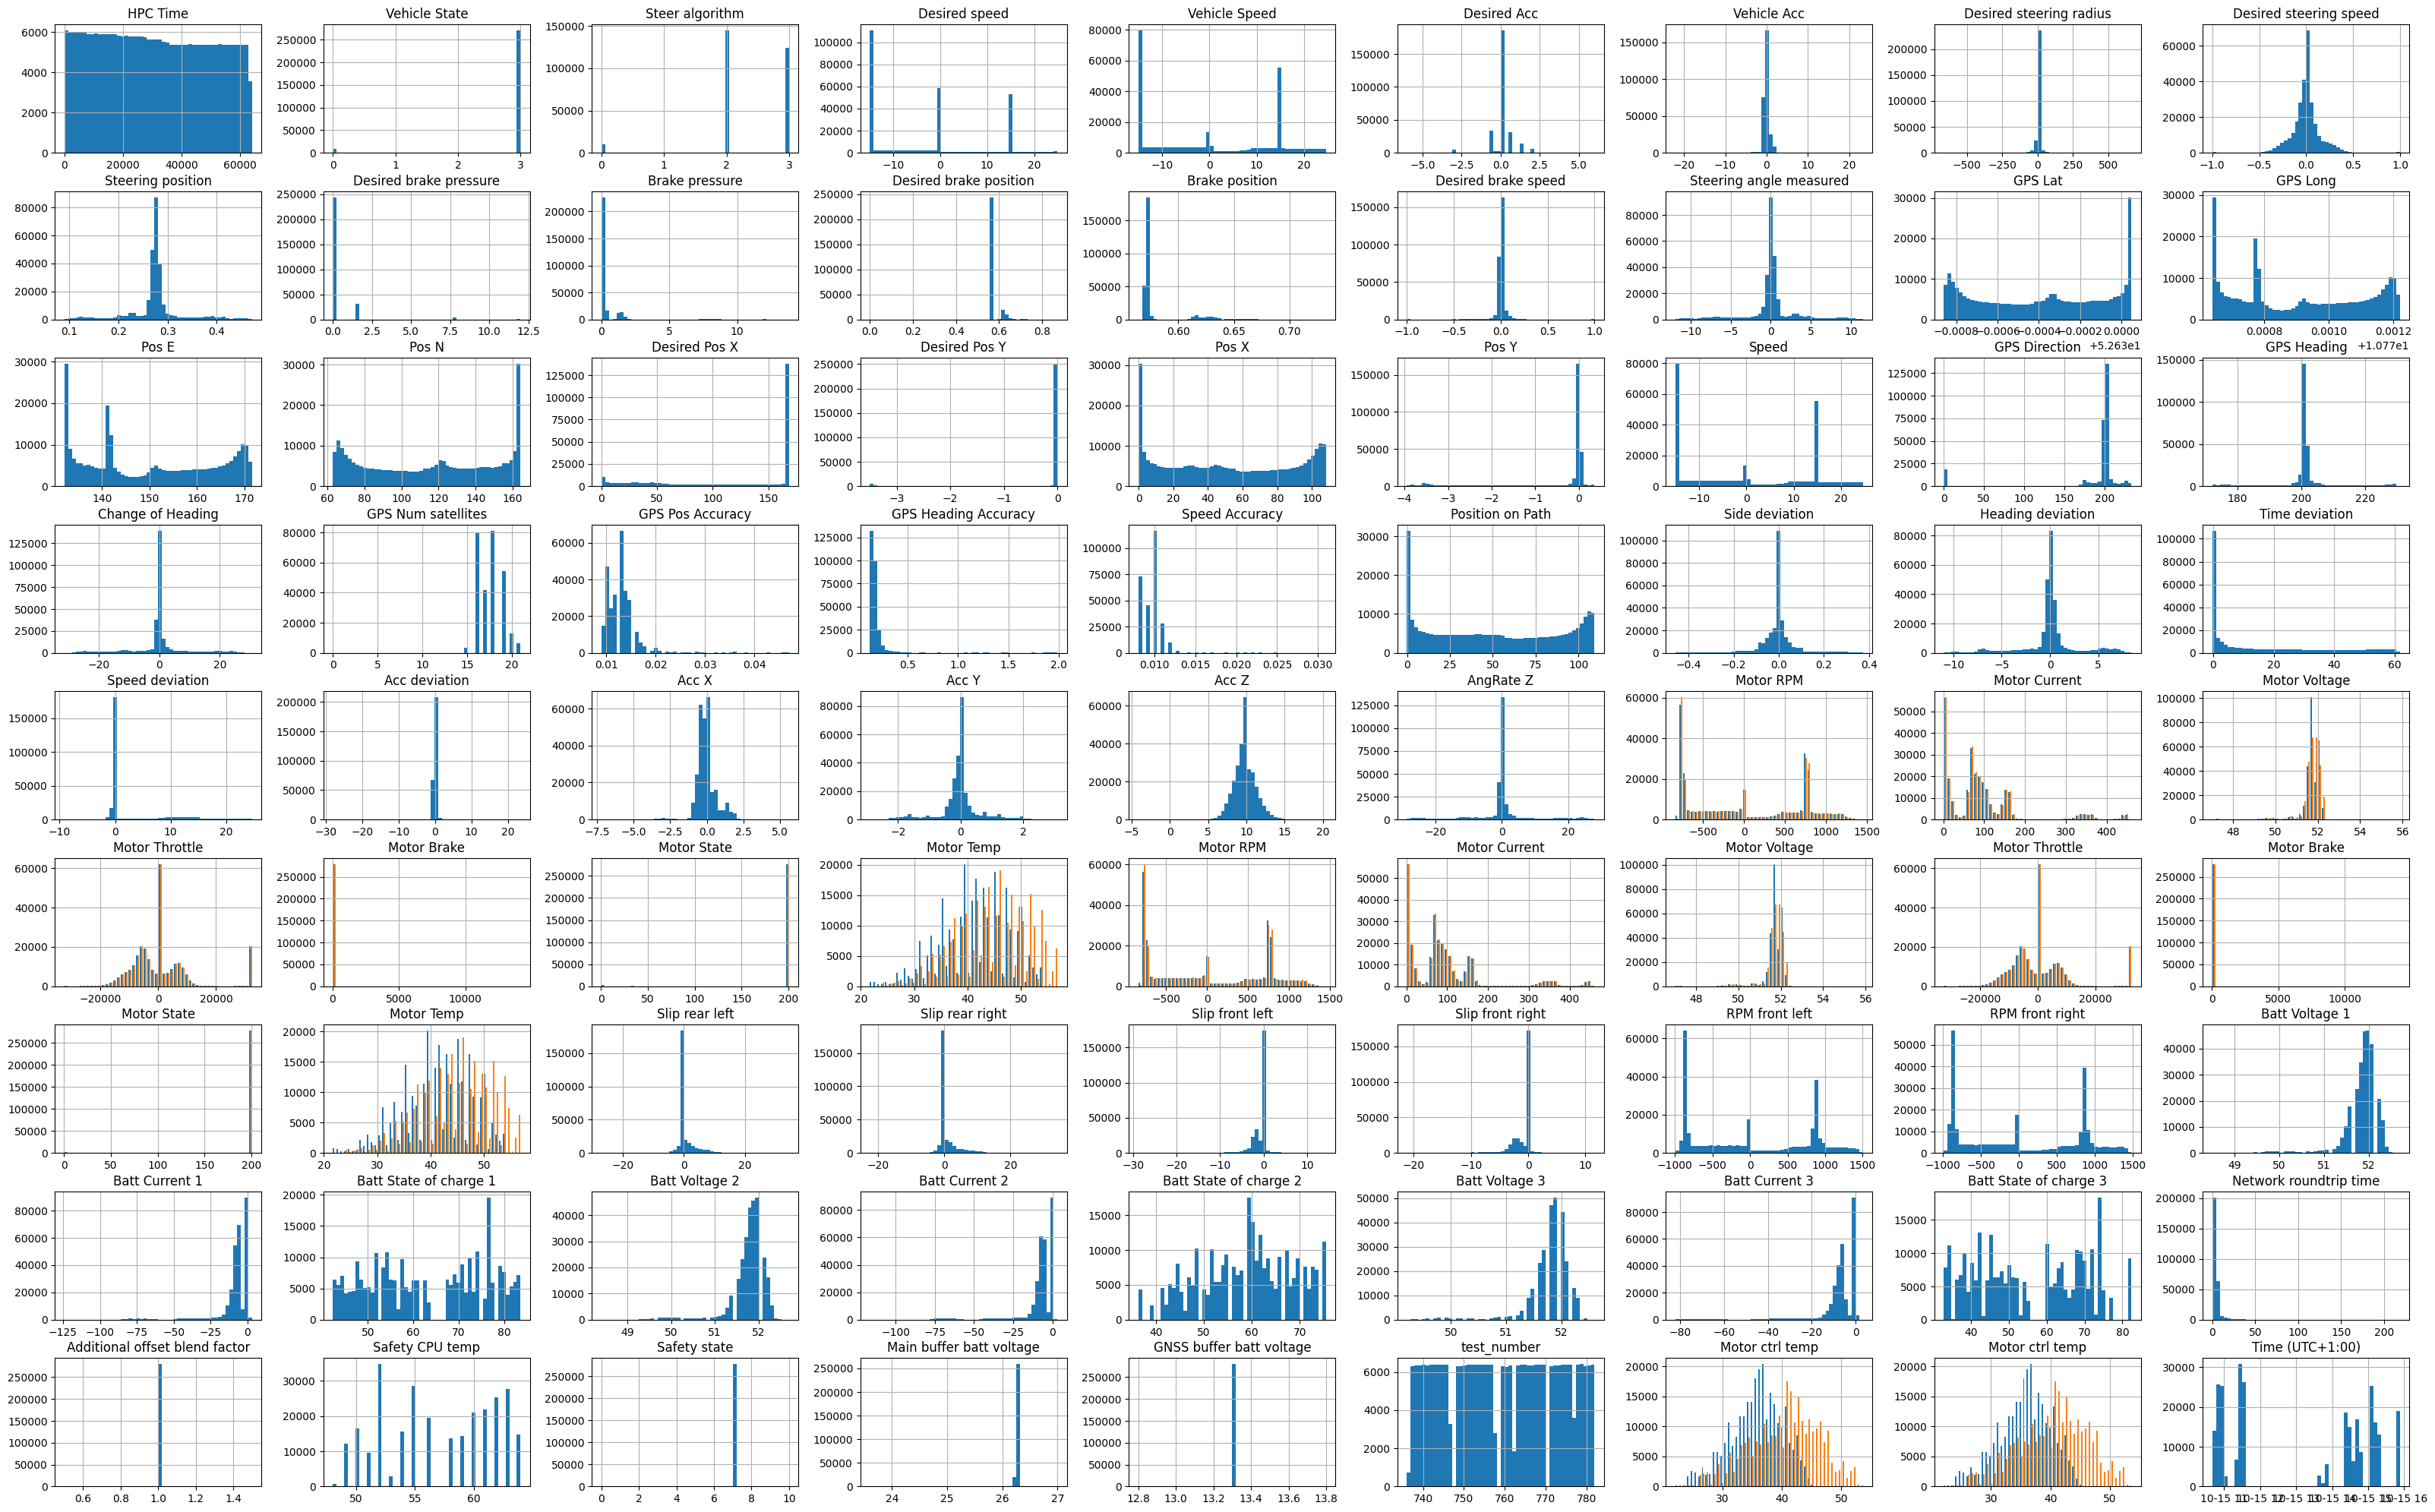

In [14]:
df.hist(bins=50,figsize=(40,25))
plt.show()